In [65]:
import pandas as pd
import numpy as np
import scipy
import statistics
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('geoGold_erro.csv')

df.dropna(subset=['request_id'], inplace=True)
requests = df['request_id'].unique()

df_mapbox = df[df['geoapi_id'] == 'MapBox']
df_tomtom = df[df['geoapi_id'] == 'TomTom']
df_here = df[df['geoapi_id'] == 'Here']


In [84]:
# Lista de todos os dataframes
dataframes = [df_mapbox, df_tomtom, df_here]

# Fazer um inner join para obter apenas os request_ids presentes em todos os dataframes
merged_df = dataframes[0]
for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on='request_id', how='inner')

cv_lat = []
cv_lon = []
cv_media = []

for i in range(merged_df.shape[0]):
    row = [merged_df.iloc[i]['lat_y'], merged_df.iloc[i]['lat']]
    cv_lat.append(np.std(row)/np.abs(np.mean(row)))
    row = [merged_df.iloc[i]['long_y'], merged_df.iloc[i]['long']]
    cv_lon.append(np.std(row)/np.abs(np.mean(row)))
    print(cv_lon[-1])
    print(cv_lat[-1])

cv_lat = np.array(cv_lat)
cv_lon = np.array(cv_lon)
cv_media = cv_lat+cv_lon/2
    

6.257408798558769e-06
1.1465253091303116e-05
1.6968479352865486e-06
3.544003493984463e-06
1.6968482951982393e-06
3.752471940823066e-06
1.1692421705619086e-06
6.266039756856141e-07
1.1472153471938328e-05
1.4620829669463171e-05
1.625284756796823e-05
1.378929950358277e-05
8.089744824601667e-06
1.5331028852595226e-05
0.0349166133625514
0.06059561435496968
0.0016120593365960363
0.023021887140823885
1.0423635700297356e-05
6.895233199882679e-06
1.7236037532882735e-05
9.404439815138328e-05
6.705675247138924e-06
2.0725835507660516e-05
0.009229069759956795
0.0537544031304603
1.4911968260706937e-06
2.7248339056245646e-06
1.065088404503105e-06
1.6768879977270642e-06
0.002297769923358908
0.0023119933486645014
1.701189109934117e-06
4.429911521992196e-06
3.5387610701908306e-05
3.613277845216923e-05
0.00015504208999291843
0.0003143839298750989
1.0632905635167928e-07
1.055537974944212e-06
6.379826817232906e-07
2.1111615208768378e-07
0.0
1.9012029333479553e-06
9.634880564699785e-05
0.0002669025818235906

In [75]:
nMapbox = len(cv_media)/df_mapbox.shape[0]
nTomTom = len(cv_media)/df_tomtom.shape[0]
nHere = len(cv_media)/df_here.shape[0]

print(nMapbox,nTomTom,nHere)

0.25213483146067417 0.1617958084983657 0.9677975848188615


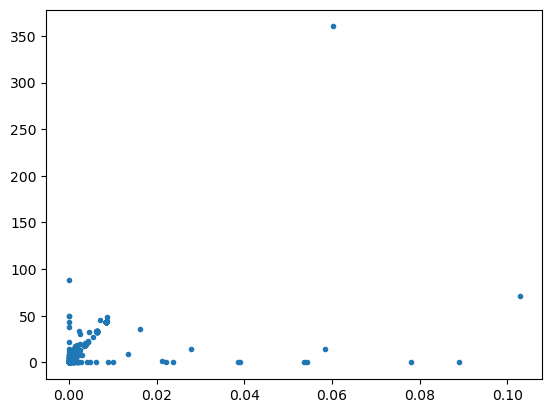

In [85]:
plt.plot(cv_media, merged_df['erro'], '.')

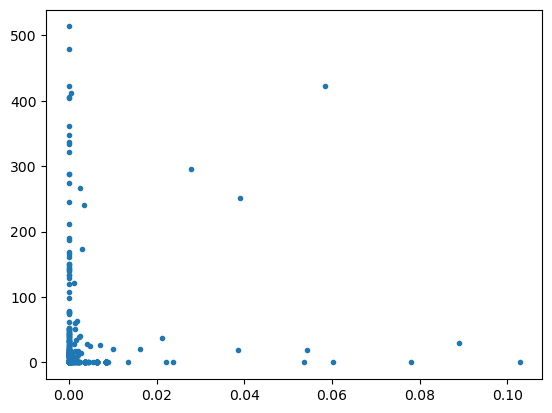

In [86]:
plt.plot(cv_media, merged_df['erro_x'], '.')

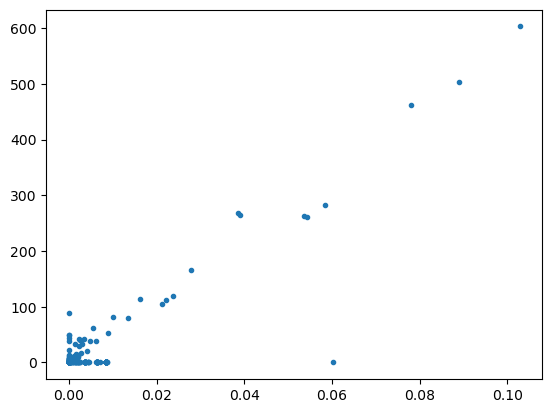

In [87]:
plt.plot(cv_media, merged_df['erro_y'], '.')